In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Leer el dataset
url = 'https://raw.githubusercontent.com/Geerdata/DS/main/Datacoder/TXT/cluster_validation_data.txt'
df= pd.read_csv(url,sep=",",header=None)
df.head()

,0,1
0,2.510076,2.159303
1,3.739776,0.974175
2,-0.142930,2.960866
3,2.817929,2.268013
4,2.302407,2.119619


In [ ]:
df.shape

(600, 2)

In [ ]:
df.values

array([[ 2.51007584,  2.15930271],
       [ 3.73977608,  0.97417528],
       [-0.14293029,  2.96086573],
       ...,
       [-2.28276371, -2.82201987],
       [-0.84783419, -2.40019899],
       [-3.14650763, -2.8942918 ]])

In [ ]:
# normalizar data
X = df.values

In [ ]:
X

array([[ 2.51007584,  2.15930271],
       [ 3.73977608,  0.97417528],
       [-0.14293029,  2.96086573],
       ...,
       [-2.28276371, -2.82201987],
       [-0.84783419, -2.40019899],
       [-3.14650763, -2.8942918 ]])

In [ ]:
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [ ]:
X

array([[ 0.27919903,  0.17509299],
       [ 0.68330768, -0.22634733],
       [-0.59264167,  0.44660786],
       ...,
       [-1.29584165, -1.51223925],
       [-0.8242898 , -1.36935512],
       [-1.57968838, -1.53672005]])

In [ ]:
# diccionarios vacios para ser almacenados los resultados
sse,slc = {}, {}

In [ ]:
for k in range(2, 10):
    # semilla de 10 para asegurar reproducibilidad
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X) # Algoritmo K means
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_ # Extraccion de labels
    sse[k] = kmeans.inertia_ # Inercia: Suma de las distancias de las muestras a su centroide mas cercano
    slc[k] = silhouette_score(X,clusters) # Calculo del indice de Silhouette

In [ ]:
sse

{2: 300.6758362209166,
 3: 99.3647128790753,
 4: 85.39871380628772,
 5: 71.67503130756269,
 6: 62.33558090488971,
 7: 52.21980576962342,
 8: 46.57398778312118,
 9: 42.64990034317238}

In [ ]:
slc

{2: 0.6439937852306329,
 3: 0.6738163984313349,
 4: 0.5499319632922846,
 5: 0.4475455512405961,
 6: 0.4441054047468125,
 7: 0.4640143352784647,
 8: 0.3406688049575541,
 9: 0.3294181477695882}

In [ ]:
clusters

array([4, 4, 2, 4, 4, 2, 2, 3, 4, 4, 2, 6, 3, 3, 3, 3, 3, 4, 4, 4, 3, 2,
       4, 4, 3, 4, 4, 2, 4, 2, 4, 3, 3, 3, 2, 4, 4, 3, 4, 2, 3, 2, 4, 4,
       2, 3, 2, 4, 4, 4, 3, 4, 2, 2, 3, 4, 2, 3, 2, 4, 2, 3, 3, 4, 4, 3,
       2, 3, 2, 4, 2, 4, 2, 4, 2, 3, 3, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 3,
       4, 3, 2, 3, 4, 4, 2, 4, 3, 2, 3, 3, 4, 3, 4, 2, 4, 3, 4, 4, 4, 2,
       2, 2, 4, 2, 3, 3, 3, 2, 2, 2, 4, 4, 4, 2, 2, 2, 3, 2, 3, 2, 3, 3,
       2, 3, 4, 3, 2, 4, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 3, 3,
       4, 3, 2, 4, 2, 3, 3, 2, 2, 4, 4, 4, 2, 3, 3, 4, 3, 2, 3, 4, 4, 3,
       3, 4, 3, 4, 2, 4, 2, 2, 3, 4, 2, 4, 3, 2, 3, 3, 3, 3, 3, 4, 3, 4,
       2, 4, 6, 6, 1, 1, 1, 6, 6, 1, 6, 6, 6, 6, 1, 1, 6, 6, 1, 1, 1, 1,
       1, 1, 6, 1, 6, 6, 6, 6, 6, 1, 6, 1, 6, 6, 1, 1, 1, 6, 6, 1, 6, 6,
       1, 6, 1, 6, 1, 6, 1, 6, 6, 1, 1, 6, 6, 1, 1, 6, 1, 6, 1, 6, 1, 6,
       1, 1, 1, 6, 6, 6, 1, 6, 6, 6, 6, 6, 1, 6, 1, 1, 6, 1, 1, 6, 6, 1,
       6, 1, 6, 6, 1, 6, 6, 6, 6, 1, 1, 1, 6, 6, 1,

# Metodo del Codo

In [ ]:
sse

{2: 300.6758362209166,
 3: 99.3647128790753,
 4: 85.39871380628772,
 5: 71.67503130756269,
 6: 62.33558090488971,
 7: 52.21980576962342,
 8: 46.57398778312118,
 9: 42.64990034317238}

In [ ]:
sse.values()

dict_values([300.6758362209166, 99.3647128790753, 85.39871380628772, 71.67503130756269, 62.33558090488971, 52.21980576962342, 46.57398778312118, 42.64990034317238])

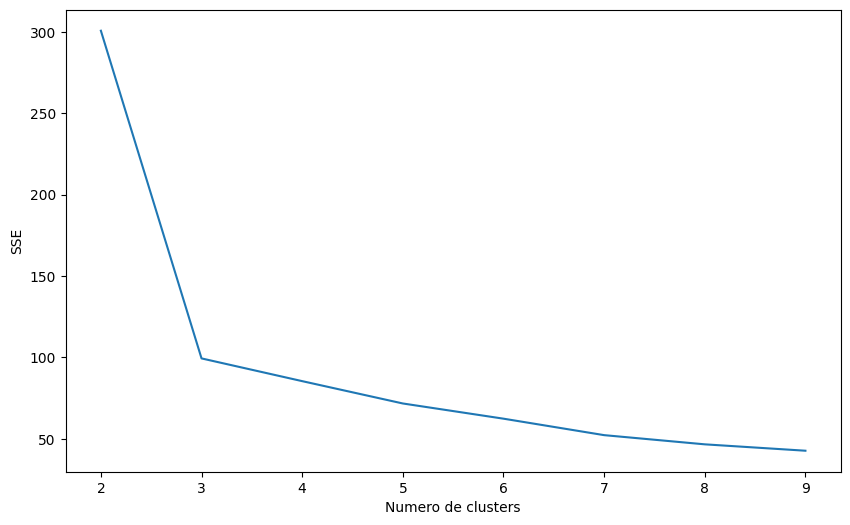

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("SSE")
plt.show()

Parece ser que un valor optimo para este caso es 3

De igual forma n=3 seria el valor optimo segun este indice

# Indice de Silhouette

In [ ]:
slc

{2: 0.6439937852306329,
 3: 0.6738163984313349,
 4: 0.5499319632922846,
 5: 0.4475455512405961,
 6: 0.4441054047468125,
 7: 0.4640143352784647,
 8: 0.3406688049575541,
 9: 0.3294181477695882}

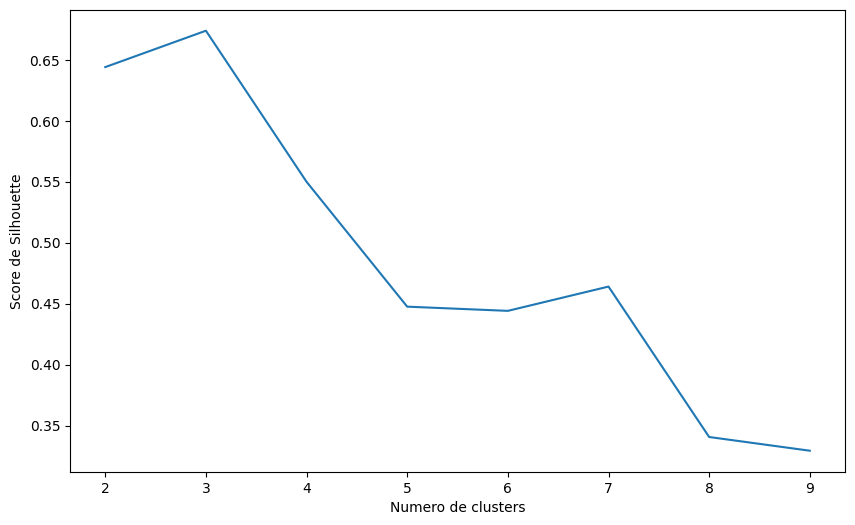

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Score de Silhouette")
plt.show()

Se observa que el valor es maximo en n=3 al igual que los otros criterios

Para n_clusters = 2 El promedio del score de silhouette es:  0.6439937852306329
Para n_clusters = 3 El promedio del score de silhouette es:  0.6738163984313349
Para n_clusters = 4 El promedio del score de silhouette es:  0.5499319632922846
Para n_clusters = 5 El promedio del score de silhouette es:  0.4475455512405961
Para n_clusters = 6 El promedio del score de silhouette es:  0.4441054047468125
Para n_clusters = 7 El promedio del score de silhouette es:  0.4640143352784647
Para n_clusters = 8 El promedio del score de silhouette es:  0.3406688049575541
Para n_clusters = 9 El promedio del score de silhouette es:  0.3294181477695882


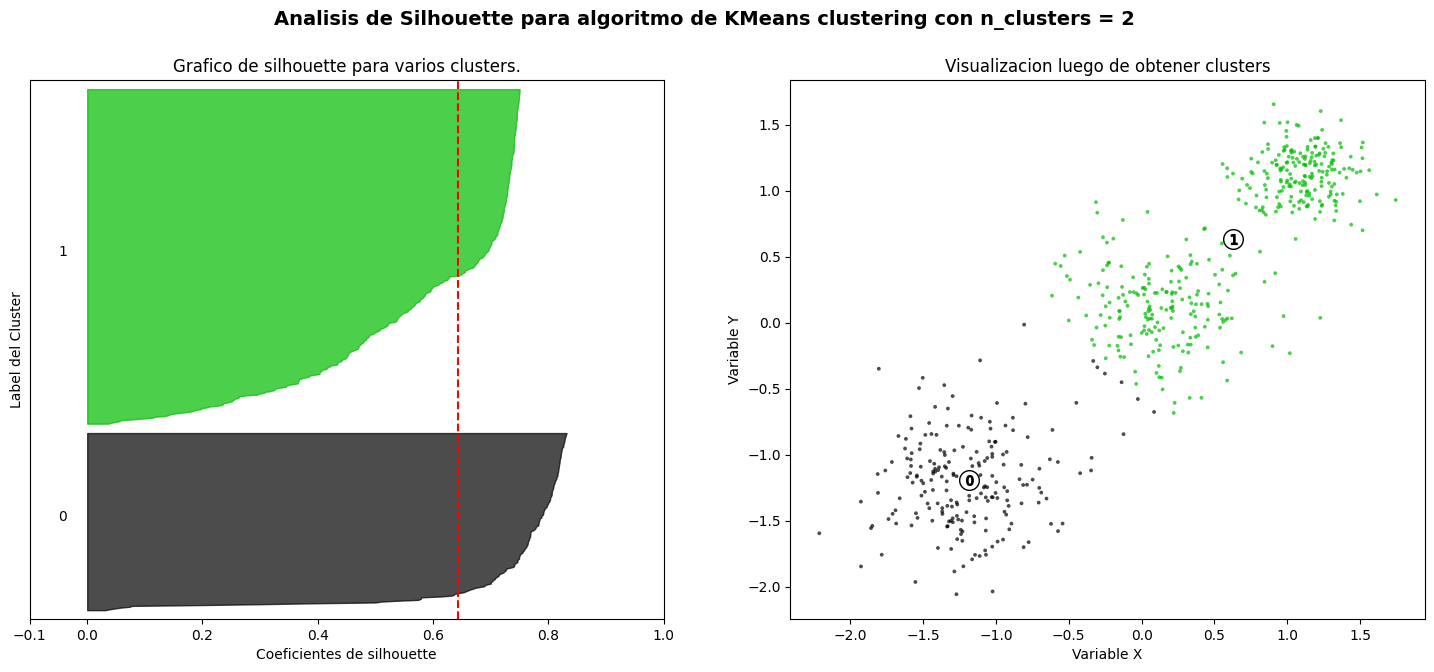

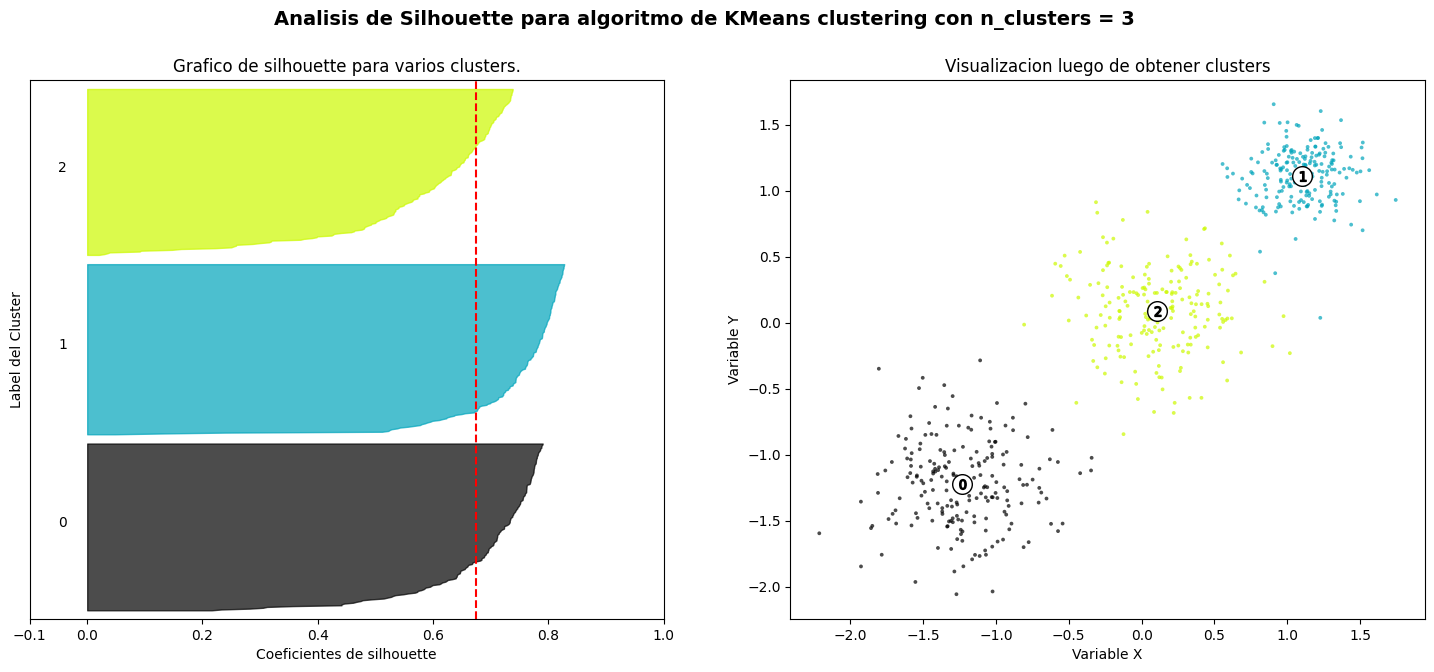

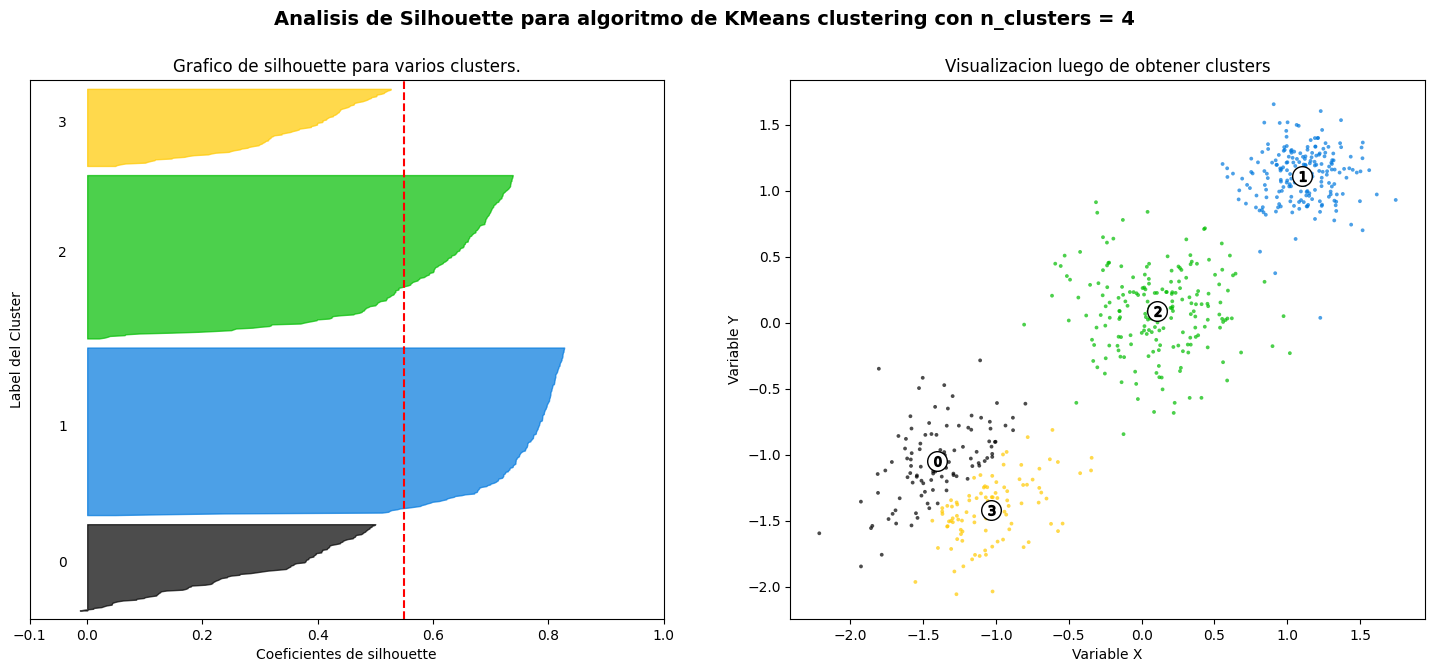

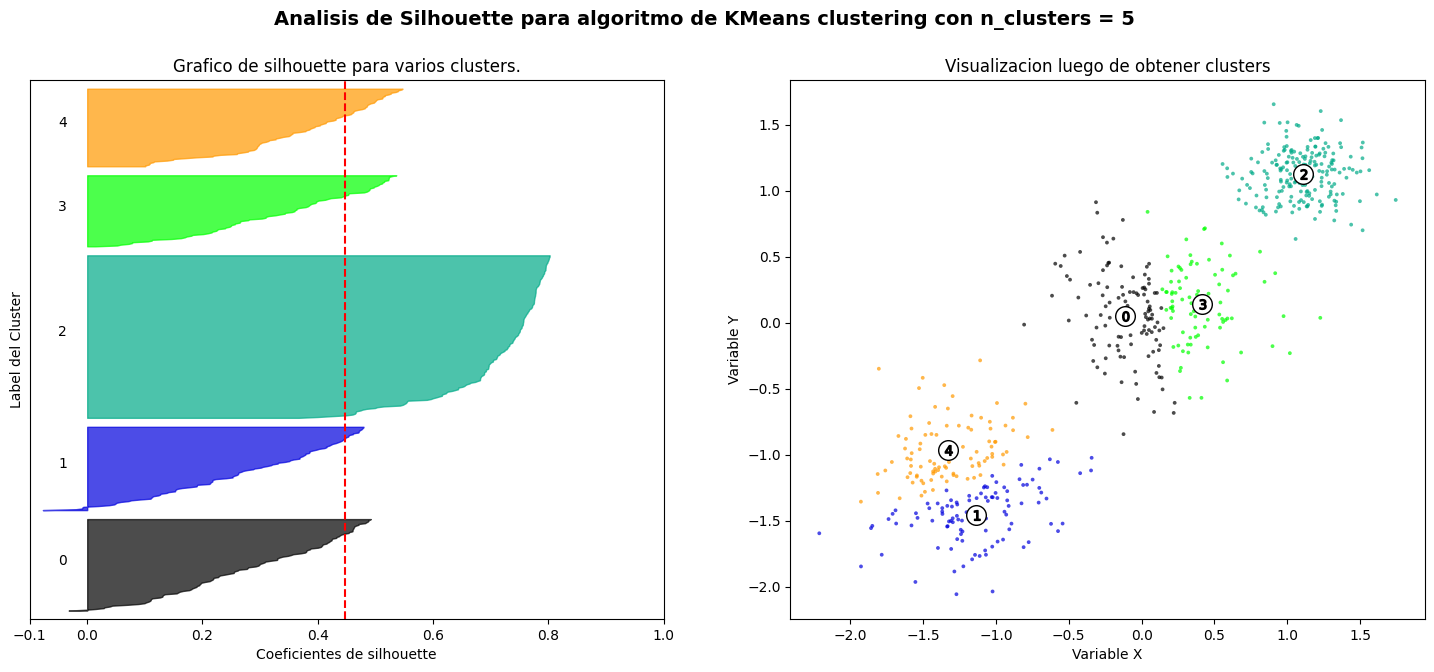

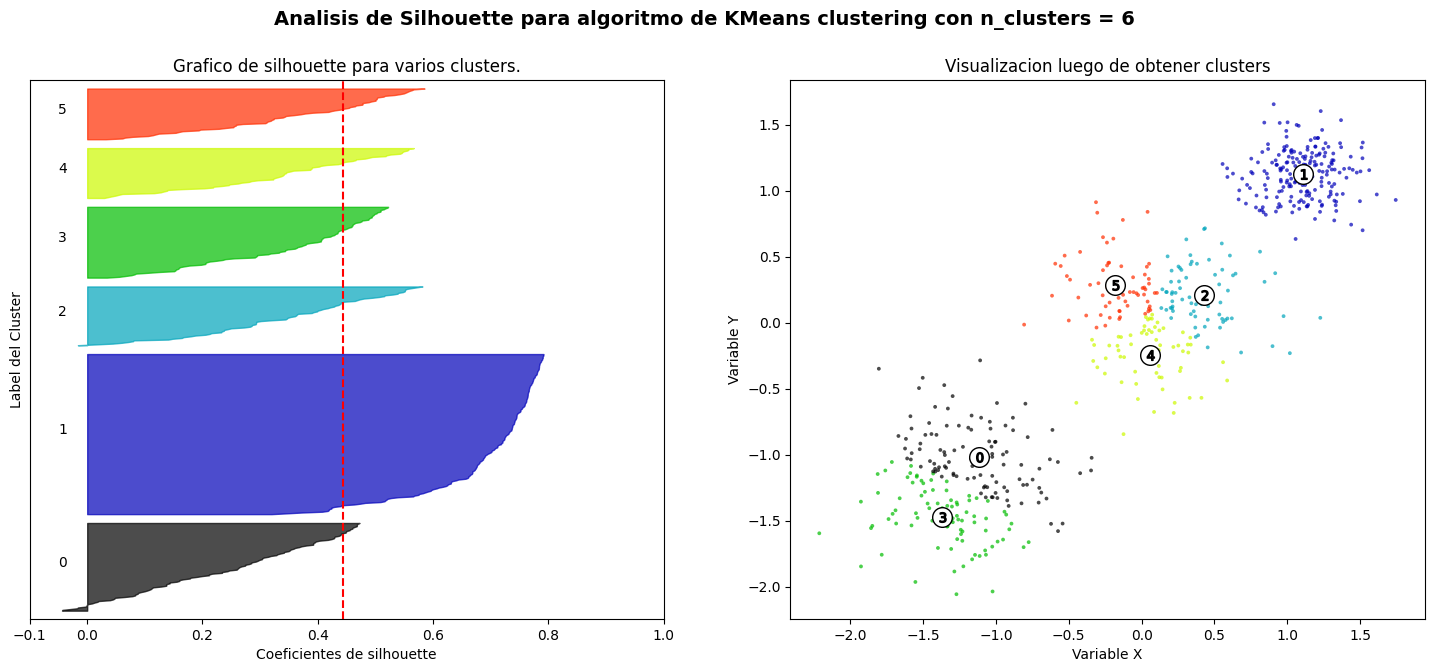

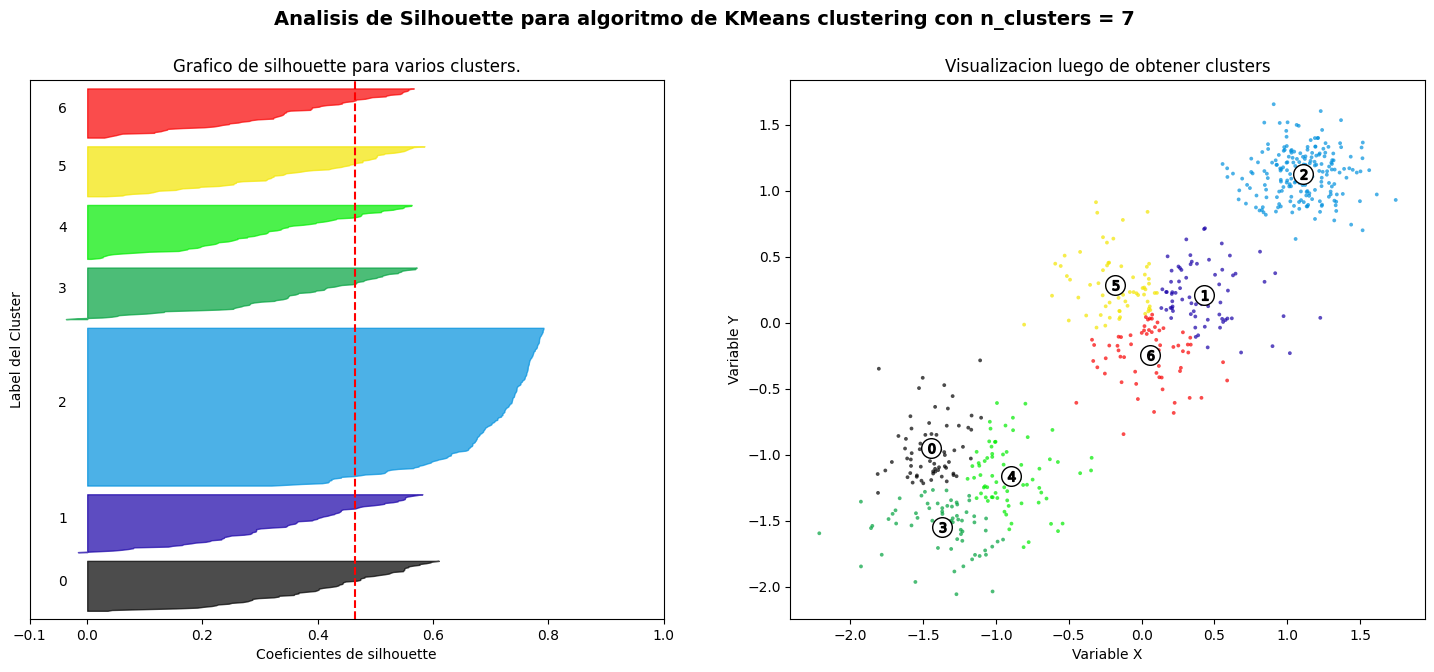

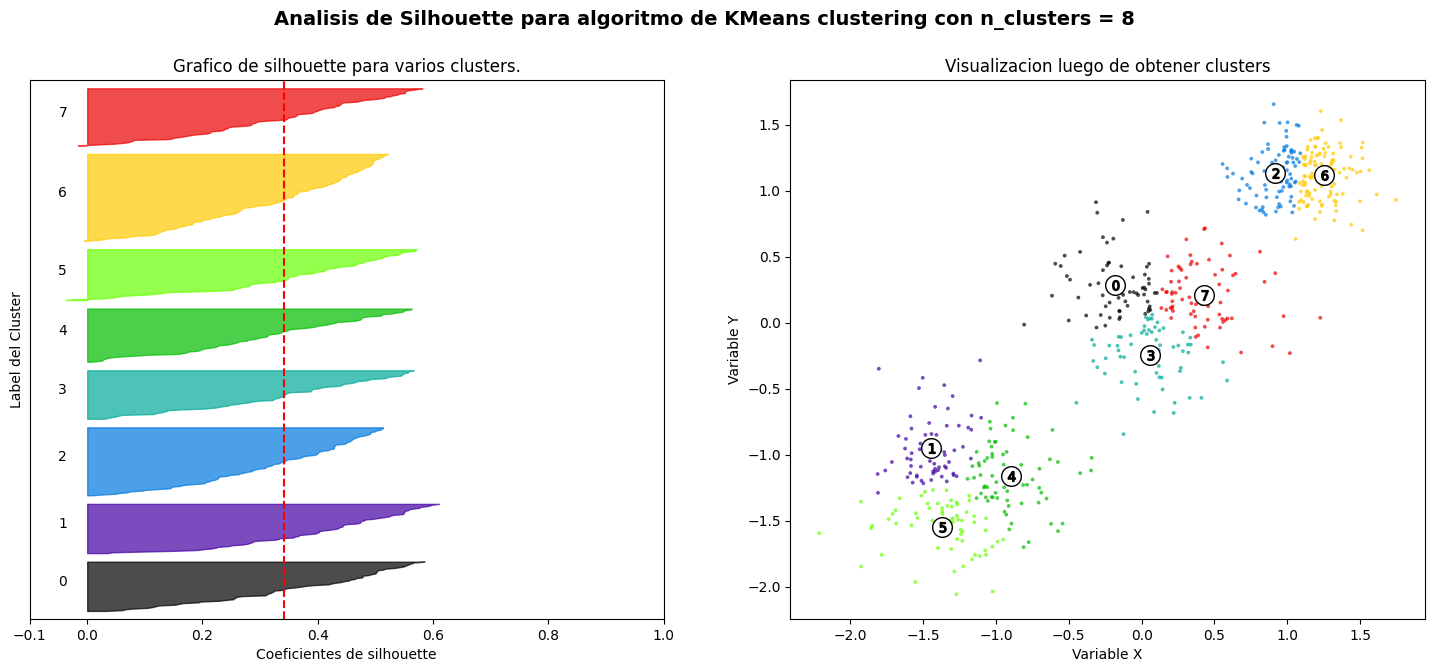

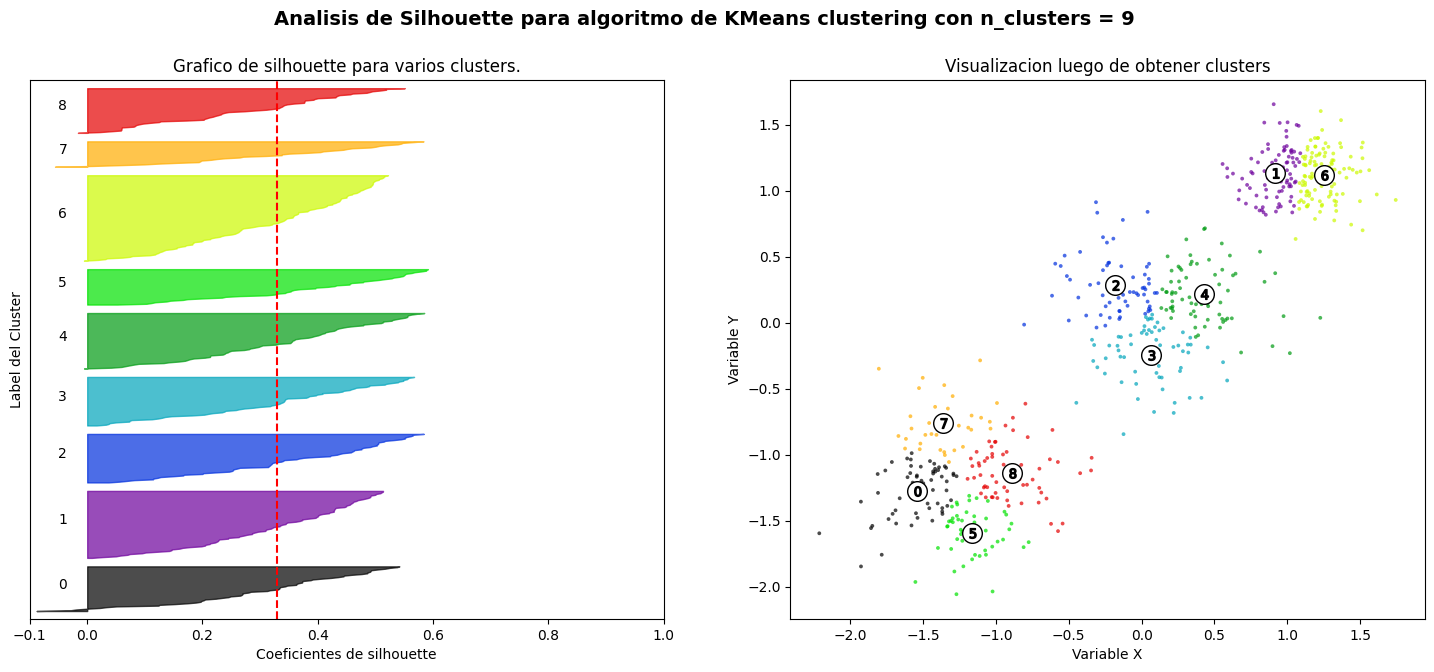

In [ ]:
for n_clusters in range(2, 10):
    # Crear un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # El 1 subplot es para el score de silhouette
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
     # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # El score de silhouette_score da el promedio de todos los valores
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Calcular el score de silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion

    # 2 grafica mostrando los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # Etiquetar a los clusters
    centers = clusterer.cluster_centers_
    # Dibujar en color blanco los centroides de los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerar los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Variable X")
    ax2.set_ylabel("Variable Y")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Graficar Clusters para K = 3

In [ ]:
df

,0,1
0,2.510076,2.159303
1,3.739776,0.974175
2,-0.142930,2.960866
3,2.817929,2.268013
4,2.302407,2.119619
...,...,...
595,-0.489418,-2.383440
596,-1.835990,-2.688553
597,-2.282764,-2.822020
598,-0.847834,-2.400199


In [ ]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

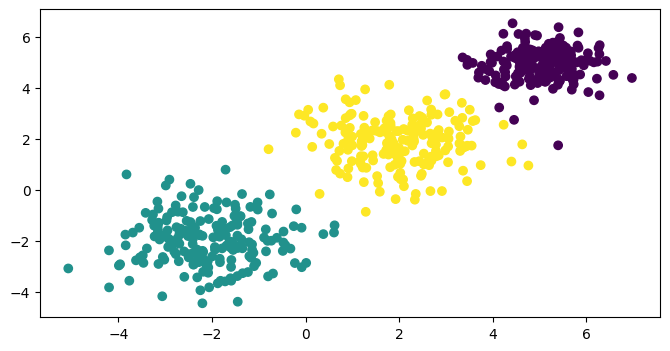

In [ ]:
# desnormalizar los datos
X = sc.inverse_transform(X)
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

In [ ]:
X

array([[ 2.51007584,  2.15930271],
       [ 3.73977608,  0.97417528],
       [-0.14293029,  2.96086573],
       ...,
       [-2.28276371, -2.82201987],
       [-0.84783419, -2.40019899],
       [-3.14650763, -2.8942918 ]])